# Additive noise

In [1]:
from wavencoder.transforms.noise import AdditiveNoise
import torchaudio

add = AdditiveNoise('/home/shangeth/Downloads/Dataset/DLIVING_16k/DLIVING')
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

noisy = add(audio)

In [2]:
audio.shape, noisy.shape

(torch.Size([1, 45261]), torch.Size([1, 45261]))

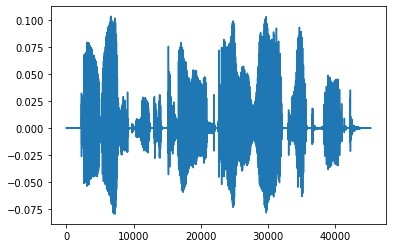

In [3]:
import IPython
import matplotlib.pyplot as plt


plt.plot(audio.reshape(-1))
plt.show()

IPython.display.Audio(audio.reshape(-1), rate=16000)

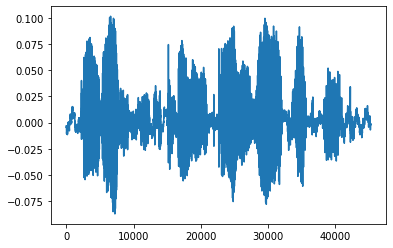

In [4]:

plt.plot(noisy.reshape(-1))
plt.show()

IPython.display.Audio(noisy.reshape(-1), rate=16000)

# Speed

In [5]:
from wavencoder.transforms.speed import SpeedChange
import torchaudio

speed = SpeedChange(factor_range=(-0.9, 0.0))
audio, _ = torchaudio.load('/home/shangeth/Downloads/Dataset/TIMIT/Wav_Data/TRAIN/FAEM0_SA2.WAV')

speedy = speed(audio)

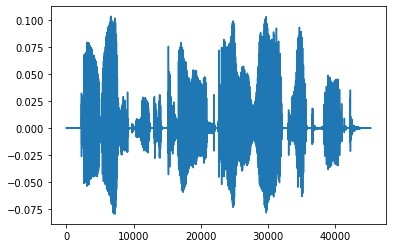

In [6]:
import IPython
import matplotlib.pyplot as plt

plt.plot(audio.reshape(-1))
plt.show()

IPython.display.Audio(audio.reshape(-1), rate=16000)

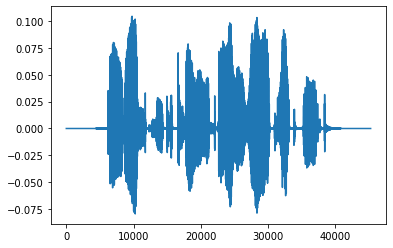

In [7]:

plt.plot(speedy.reshape(-1))
plt.show()

IPython.display.Audio(speedy.reshape(-1), rate=16000)